<a href="https://colab.research.google.com/github/EA17-ai/DLProjects/blob/main/MNIST_DATASET_EXAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
X_train[0]

In [ ]:
X_test.shape

(10000, 28, 28)

Text(0.5, 0, '5')

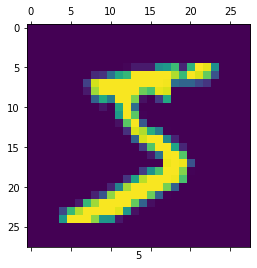

In [ ]:
plt.figure
plt.matshow(X_train[0])
plt.xlabel(y_train[0])

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)/255
X_test_flattened=(X_test.reshape(len(X_test),28*28))/255

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

In [ ]:
model=tf.keras.Sequential([
     #tf.keras.layers.Flatten(input_shape=(28,28)),              if u dont want to flatten in the. beginning of the code and then remove
     tf.keras.layers.Dense(100,input_shape=(784,),activation="relu"),
     tf.keras.layers.Dense(10,activation="sigmoid")
    ]
)

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x=X_train_flattened,y=y_train,epochs=10)

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0853 - accuracy: 0.9752


[0.0852566659450531, 0.9751999974250793]

In [ ]:
y_pred=model.predict(X_test_flattened)

In [ ]:
y_pred=[np.argmax(i) for i in y_pred]

In [ ]:
y_pred[0]

7

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(69.0, 0.5, 'Truth')

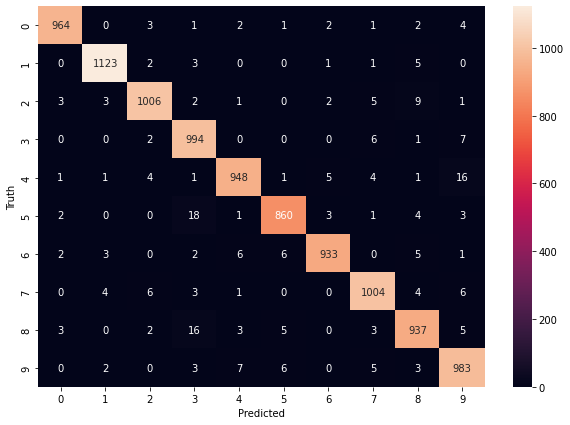

In [ ]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")